In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [2]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

In [3]:
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male,Surge_Pricing_Type
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,1,0,...,0,0,0,0,0,0,0,0,0,2
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,1,0,...,0,0,0,0,0,0,0,0,1,2
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,1,0,...,0,0,0,0,0,0,0,0,1,2
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,0,1,...,0,0,0,0,0,0,0,0,1,3
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,0,1,...,0,0,0,0,0,0,0,0,1,2


### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [18]:
### Центрируем данные

from sklearn.decomposition import PCA
X_centered = X - X.mean()

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_centered)

In [20]:
X_pca = pd.DataFrame(X_pca, columns=["pca1", "pca2"])

<Axes: xlabel='pca1', ylabel='pca2'>

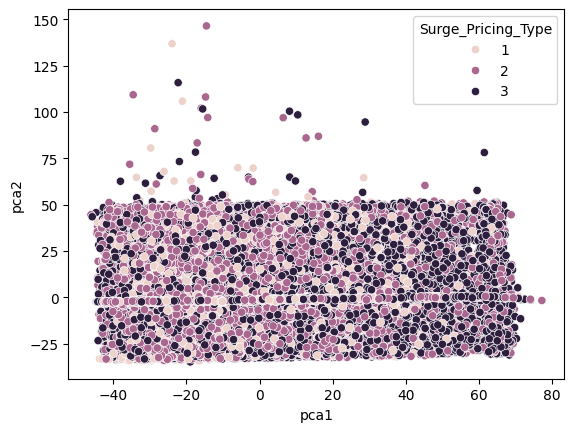

In [21]:
sns.scatterplot(x="pca1", y="pca2", hue=y, data=X_pca)

In [23]:
pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


In [30]:
component_1_corr = X_centered.corrwith(X_pca['pca1'])
component_2_corr = X_centered.corrwith(X_pca['pca2'])

In [76]:
corrs = pd.DataFrame({"pca1": component_1_corr, "pca2": component_2_corr})


<Axes: >

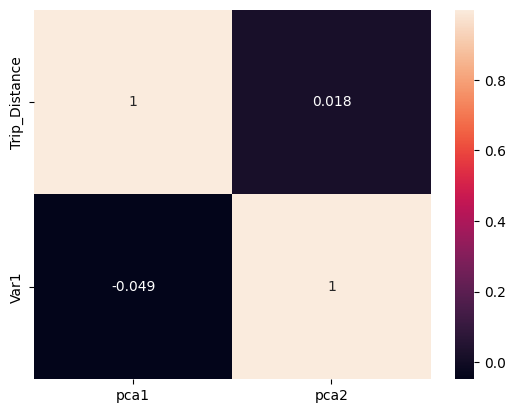

In [51]:
sns.heatmap(corrs, annot=True)

In [52]:
corrs

,pca1,pca2
Trip_Distance,0.997767,0.01841
Var1,-0.048532,0.99860


**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

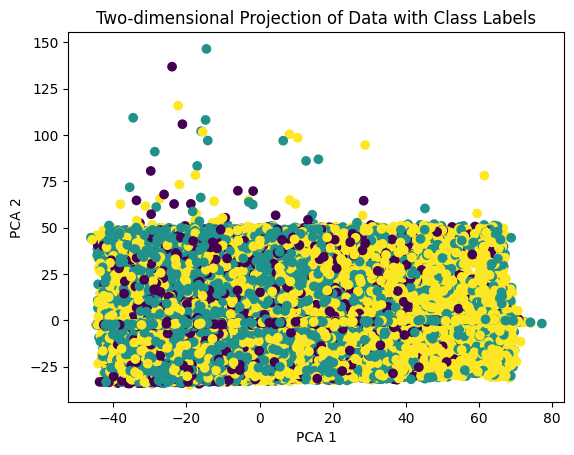

In [53]:
import matplotlib.pyplot as plt

plt.scatter(X_pca['pca1'], X_pca['pca2'], c=y)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Two-dimensional Projection of Data with Class Labels')
plt.show()


In [54]:
pca3d = PCA(n_components=3)
X_pca3d = pca3d.fit_transform(X_centered)

In [57]:
X_pca3d = pd.DataFrame(X_pca3d, columns=["pca1", "pca2", "pca3"])

In [55]:
pca3d.explained_variance_ratio_

array([0.63176117, 0.21129863, 0.13025786])

In [58]:
component_3_corr = X_centered.corrwith(X_pca3d['pca3'])

In [67]:
component_3_corr = component_3_corr.to_frame().rename(columns={0: "pca3"}) 

In [78]:
corrs = pd.concat([corrs, component_3_corr], axis=1)

In [79]:
corrs.columns

Index(['pca1', 'pca2', 'pca3'], dtype='object')

In [83]:
corrs[abs(corrs) > 0.5]

,pca1,pca2,pca3
Trip_Distance,0.997767,NaN,NaN
Customer_Since_Months,NaN,NaN,NaN
Life_Style_Index,NaN,NaN,NaN
Customer_Rating,NaN,NaN,NaN
Cancellation_Last_1Month,NaN,NaN,NaN
Var1,NaN,0.9986,NaN
Var2,NaN,NaN,0.705159
Var3,NaN,NaN,0.951081
Type_of_Cab_B,NaN,NaN,NaN
Type_of_Cab_C,NaN,NaN,NaN


Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [87]:
X_pca3d.corr().round(5)

,pca1,pca2,pca3
pca1,1.0,0.0,-0.0
pca2,0.0,1.0,0.0
pca3,-0.0,0.0,1.0


**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [88]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [93]:
param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

pipe_pca = Pipeline([('scaler', StandardScaler()), 
                 ('pca', PCA(n_components=2)), 
                 ('model', LogisticRegression())])

In [94]:
pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('model', LogisticRegression())])

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pipe_pca.predict(X_test)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      5372
           2       0.48      0.68      0.56     11349
           3       0.49      0.52      0.50      9612

    accuracy                           0.48     26333
   macro avg       0.32      0.40      0.35     26333
weighted avg       0.38      0.48      0.42     26333



In [108]:
grid_pca = GridSearchCV(pipe_pca, param_grid)
grid_pca.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [1e-05, 0.0001, 0.001, 0.01],
                         'model__penalty': ['l1', 'l2', 'elasticnet']})

In [111]:
print(classification_report(y_test, grid_pca.best_estimator_.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.479     0.691     0.566     11349
           3      0.494     0.511     0.502      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.401     0.356     26333
weighted avg      0.386     0.484     0.427     26333



In [103]:
pipe_base = Pipeline([('scaler', StandardScaler()), 
                    ('model', LogisticRegression())])

grid = GridSearchCV(pipe_base, param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [1e-05, 0.0001, 0.001, 0.01],
                         'model__penalty': ['l1', 'l2', 'elasticnet']})

In [104]:
grid.best_params_

{'model__C': 0.01, 'model__penalty': 'l2'}

In [107]:
print(classification_report(y_test, grid.best_estimator_.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.737     0.538     0.622      5372
           2      0.637     0.826     0.719     11349
           3      0.735     0.588     0.653      9612

    accuracy                          0.680     26333
   macro avg      0.703     0.651     0.665     26333
weighted avg      0.693     0.680     0.675     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [112]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [113]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    accuracy, f1_score = train_pca_i(n_components, X_train, y_train)
    accuracy_dict[n_components] = accuracy
    f1_score_dict[n_components] = f1_score
    
    
    

CPU times: user 36min 10s, sys: 12min 11s, total: 48min 22s
Wall time: 5min 10s


In [114]:
accuracy_dict

{2: 0.483651691793567,
 4: 0.5300953176622489,
 8: 0.5874378156685528,
 16: 0.5922986366916037,
 28: 0.6813883720047089}

In [117]:
f1_score_dict

{2: 0.4261477149942029,
 4: 0.4698103619828109,
 8: 0.5216930072742313,
 16: 0.5274678512062555,
 28: 0.6760757307801638}

<Axes: >

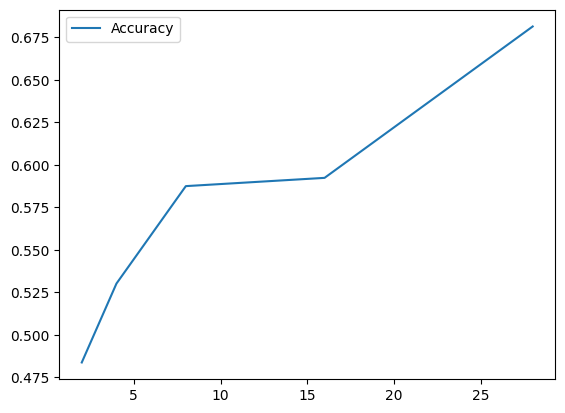

In [118]:
sns.lineplot(x=components_list, y=list(accuracy_dict.values()), label='Accuracy')

<Axes: >

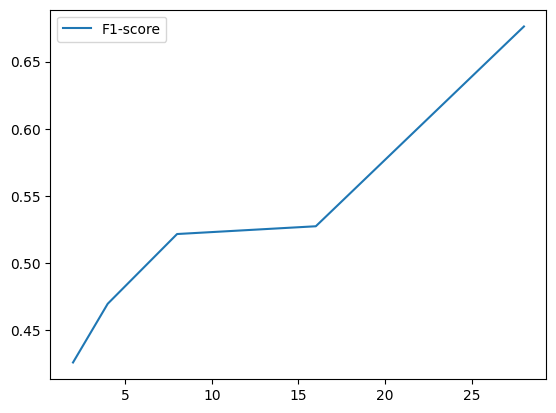

In [119]:
sns.lineplot(x=components_list, y=list(f1_score_dict.values()), label='F1-score')

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [120]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_centered)


In [122]:
tsne_results = pd.DataFrame(tsne_results, columns=['tsne_1', 'tsne_2'])

<Axes: xlabel='tsne_1', ylabel='tsne_2'>

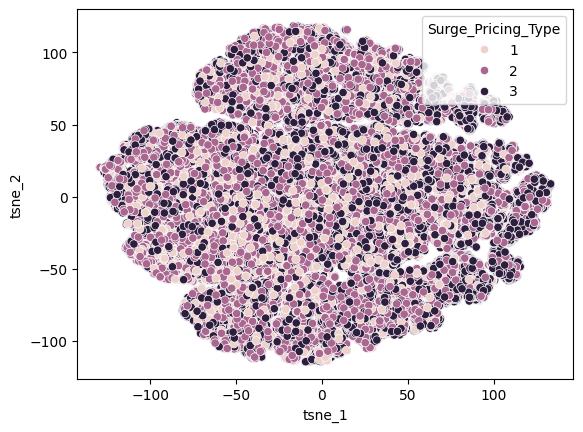

In [124]:
sns.scatterplot(x='tsne_1', y='tsne_2', hue=y, data=tsne_results)

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [125]:
tsne = TSNE(n_components=2)
tsne_results_3d = tsne.fit_transform(X_centered.iloc[:1000])

<Axes: >

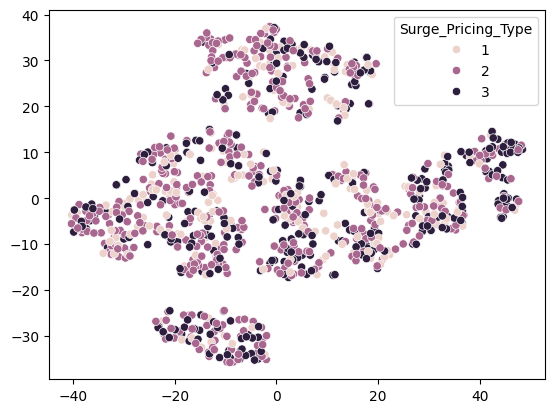

In [126]:
sns.scatterplot(x=tsne_results_3d[:, 0], y=tsne_results_3d[:, 1], hue=y[:1000])

Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!